In [3]:
import pandas as pd

data = pd.read_csv("../document/merged_data.csv")
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11272\3453922394.py:3: DtypeWarning: Columns (13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../document/merged_data.csv")


,id,msg_type,mmsi,status,turn,speed,accuracy,lon,lat,course,...,datetime,wind_direct,wind_speed,surface_curr_drc,surface_curr_speed,air_temperature,water_temperature,air_pressure,humidity,salinity
0,1,1,440500300,8.0,0.0,0.1,0.0,129.050650,35.121467,118.5,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
1,2,1,440119180,0.0,127.0,11.0,0.0,128.969183,35.014288,255.4,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
2,3,18,440051270,NaN,NaN,0.1,1.0,129.177900,35.091625,296.0,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
3,4,1,440315960,0.0,-128.0,0.1,1.0,129.035600,35.093932,0.1,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
4,5,1,440083980,8.0,0.0,0.0,1.0,128.982018,35.052095,181.1,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9


In [4]:
data = data.drop(columns=['timestamp'])  # 'timestamp '을 삭제

# 결과 저장
data.to_csv('../document/drop_merged_data.csv', index=False)  # 수정된 데이터를 저장

In [5]:
# NaN 값 확인
print(data.isna().sum())

id                        0
msg_type                  0
mmsi                      0
status                88991
turn                  88992
speed                 72729
accuracy              36303
lon                   36303
lat                   36308
course                72741
heading               73187
created_at                0
datetime              52144
wind_direct           52144
wind_speed            52144
surface_curr_drc      52144
surface_curr_speed    52144
air_temperature       52144
water_temperature     52144
air_pressure          52144
humidity              52144
salinity              52144
dtype: int64


In [6]:
# NaN 값이 있는 행의 인덱스 찾기
first_nan_index = data['datetime'].isna().idxmax()  # NaN 값이 처음 나타나는 인덱스
print(f"'datetime' 열에서 NaN 값이 처음 나타나는 행의 인덱스: {first_nan_index}")

# NaN 값이 시작하는 행 데이터 확인
print(data.iloc[first_nan_index])


'datetime' 열에서 NaN 값이 처음 나타나는 행의 인덱스: 1797959
id                                1797960
msg_type                                1
mmsi                            440001060
status                                0.0
turn                               -128.0
speed                                 0.0
accuracy                              1.0
lon                            129.028808
lat                             35.087457
course                              345.2
heading                             511.0
created_at            2025-01-21 11:30:01
datetime                              NaN
wind_direct                           NaN
wind_speed                            NaN
surface_curr_drc                      NaN
surface_curr_speed                    NaN
air_temperature                       NaN
water_temperature                     NaN
air_pressure                          NaN
humidity                              NaN
salinity                              NaN
Name: 1797959, dtype: object


In [7]:
# 특정 행(1172700~1172800)의 'created_at'과 'datetime' 열만 선택
subset = data.iloc[1791300:1797959][['created_at', 'datetime']]
print(subset)


                  created_at             datetime
1791300  2025-01-21 11:24:58  2025-01-21 11:20:00
1791301  2025-01-21 11:24:58  2025-01-21 11:20:00
1791302  2025-01-21 11:24:58  2025-01-21 11:20:00
1791303  2025-01-21 11:24:58  2025-01-21 11:20:00
1791304  2025-01-21 11:24:58  2025-01-21 11:20:00
...                      ...                  ...
1797954  2025-01-21 11:30:00  2025-01-21 11:20:00
1797955  2025-01-21 11:30:00  2025-01-21 11:20:00
1797956  2025-01-21 11:30:00  2025-01-21 11:20:00
1797957  2025-01-21 11:30:00  2025-01-21 11:20:00
1797958  2025-01-21 11:30:00  2025-01-21 11:20:00

[6659 rows x 2 columns]


In [8]:


# 특정 행 번호 이후 데이터 삭제
row_to_drop_from = 1791300  # 삭제를 시작할 행 번호 (0부터 시작)
data_dropped = data.iloc[:row_to_drop_from]

# mmsi 값이 0인 데이터 제거
data_cleaned = data_dropped[data_dropped['mmsi'] != 0]

# 결과 확인
print(f"최종 데이터 크기: {data_cleaned.shape}")


# 결과 저장
data_cleaned.to_csv('../document/data_after_dropping.csv', index=False, encoding='utf-8-sig')

print("최종 클린 데이터가 '../document/data_after_dropping.csv'로 저장되었습니다.")

최종 데이터 크기: (1790508, 22)
최종 클린 데이터가 '../document/data_after_dropping.csv'로 저장되었습니다.


In [9]:
df = pd.read_csv("../document/data_after_dropping.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11272\2220342019.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../document/data_after_dropping.csv")


,id,msg_type,mmsi,status,turn,speed,accuracy,lon,lat,course,...,datetime,wind_direct,wind_speed,surface_curr_drc,surface_curr_speed,air_temperature,water_temperature,air_pressure,humidity,salinity
0,1,1,440500300,8.0,0.0,0.1,0.0,129.050650,35.121467,118.5,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
1,2,1,440119180,0.0,127.0,11.0,0.0,128.969183,35.014288,255.4,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
2,3,18,440051270,NaN,NaN,0.1,1.0,129.177900,35.091625,296.0,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
3,4,1,440315960,0.0,-128.0,0.1,1.0,129.035600,35.093932,0.1,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9
4,5,1,440083980,8.0,0.0,0.0,1.0,128.982018,35.052095,181.1,...,2025-01-20 10:00:00,328.0,3.08,53.0,0.3,6.2,12.7,1014.0,53.0,19.9


In [10]:
print(df.isna().sum())

id                        0
msg_type                  0
mmsi                      0
status                86470
turn                  86471
speed                 70677
accuracy              35267
lon                   35267
lat                   35272
course                70686
heading               71132
created_at                0
datetime                  0
wind_direct               0
wind_speed                0
surface_curr_drc          0
surface_curr_speed        0
air_temperature           0
water_temperature         0
air_pressure              0
humidity                  0
salinity                  0
dtype: int64


In [11]:
import pandas as pd

# 원본 데이터 로드
file_path = '../document/data_after_dropping.csv'
data = pd.read_csv(file_path)

# 시간 데이터 변환
data['created_at'] = pd.to_datetime(data['created_at'])

# 시간 순 정렬
data = data.sort_values(['mmsi', 'created_at'])

# MMSI별 결측치와 이전/이후 값 확인
result = []

for mmsi, group in data.groupby('mmsi'):
    group = group.reset_index(drop=True)
    for i, row in group.iterrows():
        if pd.isna(row['lat']) or pd.isna(row['lon']):  # 위도 또는 경도가 NaN인 경우
            # 이전 값 확인
            has_previous_lat = False
            has_previous_lon = False

            if i > 0:
                has_previous_lat = not pd.isna(group.loc[:i - 1, 'lat']).all()
                has_previous_lon = not pd.isna(group.loc[:i - 1, 'lon']).all()

            # 이후 값 확인
            has_next_lat = not pd.isna(group.loc[i + 1:, 'lat']).all()
            has_next_lon = not pd.isna(group.loc[i + 1:, 'lon']).all()

            # 결과 저장
            result.append({
                'mmsi': mmsi,
                'created_at': row['created_at'],
                'lat_is_nan': pd.isna(row['lat']),
                'lon_is_nan': pd.isna(row['lon']),
                'has_previous_lat': has_previous_lat,
                'has_previous_lon': has_previous_lon,
                'has_next_lat': has_next_lat,
                'has_next_lon': has_next_lon
            })

# 결과 데이터프레임 생성
result_df = pd.DataFrame(result)

# 총 lat과 lon이 결측치인 데이터
total_nan = result_df[(result_df['lat_is_nan'] & result_df['lon_is_nan'])]

# 결측치 조건: 앞뒤 모두 없을 때 제거
all_nan = result_df[
    (result_df['lat_is_nan'] & result_df['lon_is_nan']) &
    (~result_df['has_previous_lat'] & ~result_df['has_previous_lon']) &
    (~result_df['has_next_lat'] & ~result_df['has_next_lon'])
]

# 결측치 조건: 앞이 없고, 뒤만 있을 때 제거
only_next_data = result_df[
    (result_df['lat_is_nan'] & result_df['lon_is_nan']) &
    (~result_df['has_previous_lat'] & ~result_df['has_previous_lon']) &
    (result_df['has_next_lat'] & result_df['has_next_lon'])
]

# 최종적으로 제거할 데이터 합치기
to_remove = pd.concat([all_nan, only_next_data])

# 제거할 데이터 확인
print(f"제거할 데이터 행 수: {len(to_remove)}")

# 원본 데이터에서 제거할 데이터 제외
cleaned_data = data[~data.set_index(['mmsi', 'created_at']).index.isin(to_remove.set_index(['mmsi', 'created_at']).index)]

# 최종 데이터 저장
cleaned_data.to_csv('../document/final_cleaned_data.csv', index=False, encoding='utf-8-sig')

print(f"최종 데이터가 저장되었습니다. 최종 데이터 행 수: {len(cleaned_data)}")


C:\Users\user\AppData\Local\Temp\ipykernel_11272\1732200355.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


제거할 데이터 행 수: 88
최종 데이터가 저장되었습니다. 최종 데이터 행 수: 1790420


In [12]:
import pandas as pd

# 경로 설정 (원본 데이터와 최종 데이터)
original_file_path = '../document/data_after_dropping.csv'
final_cleaned_file_path = '../document//final_cleaned_data.csv'

# 데이터 로드
original_data = pd.read_csv(original_file_path)
final_cleaned_data = pd.read_csv(final_cleaned_file_path)

# 데이터 크기 비교
original_count = len(original_data)
final_cleaned_count = len(final_cleaned_data)

# 열 이름 비교
original_columns = original_data.columns.tolist()
final_cleaned_columns = final_cleaned_data.columns.tolist()

# 결과 출력
print(f"원본 데이터 행 수: {original_count}")
print(f"최종 클린 데이터 행 수: {final_cleaned_count}")
print(f"원본 데이터 열 이름: {original_columns}")
print(f"최종 클린 데이터 열 이름: {final_cleaned_columns}")

# 최종 클린 데이터에 없는 행 확인
removed_rows = original_data[~original_data.set_index(['mmsi', 'created_at']).index.isin(final_cleaned_data.set_index(['mmsi', 'created_at']).index)]
print(f"제거된 데이터 행 수: {len(removed_rows)}")

# 제거된 데이터 확인
print("제거된 데이터 예시:")
print(removed_rows
      )


C:\Users\user\AppData\Local\Temp\ipykernel_11272\2554065206.py:8: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv(original_file_path)


원본 데이터 행 수: 1790508
최종 클린 데이터 행 수: 1790420
원본 데이터 열 이름: ['id', 'msg_type', 'mmsi', 'status', 'turn', 'speed', 'accuracy', 'lon', 'lat', 'course', 'heading', 'created_at', 'datetime', 'wind_direct', 'wind_speed', 'surface_curr_drc', 'surface_curr_speed', 'air_temperature', 'water_temperature', 'air_pressure', 'humidity', 'salinity']
최종 클린 데이터 열 이름: ['id', 'msg_type', 'mmsi', 'status', 'turn', 'speed', 'accuracy', 'lon', 'lat', 'course', 'heading', 'created_at', 'datetime', 'wind_direct', 'wind_speed', 'surface_curr_drc', 'surface_curr_speed', 'air_temperature', 'water_temperature', 'air_pressure', 'humidity', 'salinity']
제거된 데이터 행 수: 88
제거된 데이터 예시:
              id  msg_type       mmsi  status  turn  speed  accuracy  lon  \
58            59         6  994401595     NaN   NaN    NaN       NaN  NaN   
94            95         8  994401594     NaN   NaN    NaN       NaN  NaN   
303          304         8  994401578     NaN   NaN    NaN       NaN  NaN   
330          331        24  44012425

In [13]:
# 총 lat과 lon이 결측치인 행의 갯수
total_nan = result_df[(result_df['lat_is_nan'] & result_df['lon_is_nan'])]

# 지금, 앞뒤로 다 없는 행의 갯수
all_nan = result_df[
    (result_df['lat_is_nan'] & result_df['lon_is_nan']) &
    (~result_df['has_previous_lat'] & ~result_df['has_previous_lon']) &
    (~result_df['has_next_lat'] & ~result_df['has_next_lon'])
]

# 지금은 없지만 앞뒤로는 다 있는 행의 갯수
surrounded_by_data = result_df[
    (result_df['lat_is_nan'] & result_df['lon_is_nan']) &
    (result_df['has_previous_lat'] & result_df['has_previous_lon']) &
    (result_df['has_next_lat'] & result_df['has_next_lon'])
]

# 앞이 없고 뒤만 데이터가 있는 경우
only_next_data = result_df[
    (result_df['lat_is_nan'] & result_df['lon_is_nan']) &
    (~result_df['has_previous_lat'] & ~result_df['has_previous_lon']) &
    (result_df['has_next_lat'] & result_df['has_next_lon'])
]

# 앞은 있고 뒤는 없는 경우
only_previous_data = result_df[
    (result_df['lat_is_nan'] & result_df['lon_is_nan']) &
    (result_df['has_previous_lat'] & result_df['has_previous_lon']) &
    (~result_df['has_next_lat'] & ~result_df['has_next_lon'])
]

# 지금은 없지만 앞 혹은 뒤에 데이터가 있는 갯수
has_either_data = result_df[
    (result_df['lat_is_nan'] & result_df['lon_is_nan']) &
    ((result_df['has_previous_lat'] & result_df['has_previous_lon']) |
     (result_df['has_next_lat'] & result_df['has_next_lon']))
]

# 결과 출력
print(f"총 lat과 lon이 결측치인 행의 갯수: {len(total_nan)}")
print(f"지금, 앞뒤로 다 없는 행의 갯수: {len(all_nan)}")
print(f"지금은 없지만 앞뒤로는 다 있는 행의 갯수: {len(surrounded_by_data)}")
print(f"앞이 없고 뒤만 데이터가 있는 행의 갯수: {len(only_next_data)}")
print(f"앞은 있고 뒤는 없는 행의 갯수: {len(only_previous_data)}")
print(f"지금 없지만 앞 혹은 뒤에 데이터가 있는 갯수: {len(has_either_data)}")


총 lat과 lon이 결측치인 행의 갯수: 35267
지금, 앞뒤로 다 없는 행의 갯수: 20
지금은 없지만 앞뒤로는 다 있는 행의 갯수: 35006
앞이 없고 뒤만 데이터가 있는 행의 갯수: 68
앞은 있고 뒤는 없는 행의 갯수: 173
지금 없지만 앞 혹은 뒤에 데이터가 있는 갯수: 35247


In [14]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('../document/final_cleaned_data.csv')

# NaN을 새로운 범주로 추가
data['status'] = data['status'].fillna('nan')  # NaN 값을 'nan' 문자열로 변환

# 원-핫 인코딩 수행
status_encoded = pd.get_dummies(data['status'], prefix='status')

# True/False를 0/1로 변환
status_encoded = status_encoded.astype(int)

# 원본 데이터와 원-핫 인코딩된 데이터 병합
data = pd.concat([data, status_encoded], axis=1)

# 결과 확인
print(data.head())

# 결과 저장
data.to_csv('../document/final_cleaned_data_with_nan_encoded.csv', index=False, encoding='utf-8-sig')

print("결과 데이터가 'final_cleaned_data_with_nan_encoded.csv'로 저장되었습니다.")


      id  msg_type     mmsi status  turn  speed  accuracy         lon  \
0  13448         4  4310693    nan   NaN    NaN       1.0  129.207578   
1  76248         4  4310693    nan   NaN    NaN       1.0  129.205167   
2  76674         4  4310693    nan   NaN    NaN       1.0  129.353333   
3  82588         4  4310693    nan   NaN    NaN       1.0  129.353333   
4  95834         4  4310693    nan   NaN    NaN       1.0  129.205167   

         lat  course  ...  status_5.0 status_6.0 status_7.0  status_8.0  \
0  -7.805873     NaN  ...           0          0          0           0   
1  34.137167     NaN  ...           0          0          0           0   
2  34.641333     NaN  ...           0          0          0           0   
3  34.641333     NaN  ...           0          0          0           0   
4  34.137167     NaN  ...           0          0          0           0   

   status_9.0  status_10.0  status_11.0  status_12.0  status_15.0  status_nan  
0           0            0    

In [15]:
# 대한민국 위도 및 경도 범위
lat_min, lat_max = 34.5, 35.5
lon_min, lon_max = 128.5, 130.0

# 대한민국 범위 내 데이터 필터링
data = data[(data['lat'] >= lat_min) & (data['lat'] <= lat_max) &
                    (data['lon'] >= lon_min) & (data['lon'] <= lon_max)]

# 이상치 데이터 확인 (대한민국 범위를 벗어나는 데이터)
outliers = data[~((data['lat'] >= lat_min) & (data['lat'] <= lat_max) &
                  (data['lon'] >= lon_min) & (data['lon'] <= lon_max))]
print("이상치 데이터:\n", outliers)

# 결과 확인
print(f"대한민국 범위 내 데이터 크기: {data.shape}")

data.to_csv('../document/cleaned_data_korea.csv', index=False, encoding='utf-8-sig')
print("클린 데이터가 'cleaned_data_korea.csv'로 저장되었습니다.")

이상치 데이터:
 Empty DataFrame
Columns: [id, msg_type, mmsi, status, turn, speed, accuracy, lon, lat, course, heading, created_at, datetime, wind_direct, wind_speed, surface_curr_drc, surface_curr_speed, air_temperature, water_temperature, air_pressure, humidity, salinity, status_0.0, status_1.0, status_2.0, status_3.0, status_5.0, status_6.0, status_7.0, status_8.0, status_9.0, status_10.0, status_11.0, status_12.0, status_15.0, status_nan]
Index: []

[0 rows x 36 columns]
대한민국 범위 내 데이터 크기: (1711918, 36)
클린 데이터가 'cleaned_data_korea.csv'로 저장되었습니다.


In [16]:
# status 값의 고유 값 및 분포 확인
print("status 값 분포:")
print(data['status'].value_counts(dropna=False))


status 값 분포:
status
0.0     999037
15.0    257932
5.0     131841
8.0     125297
1.0      59095
nan      44491
2.0      38899
7.0      27226
3.0      17320
11.0      8323
10.0      2453
6.0          2
12.0         1
9.0          1
Name: count, dtype: int64


In [17]:
# 숫자로 변환할 수 없는 값 확인
for column in data.columns:
    try:
        data[column].astype(float)
    except ValueError as e:
        print(f"열 '{column}'에 변환 불가능한 값이 있습니다.")


열 'created_at'에 변환 불가능한 값이 있습니다.
열 'datetime'에 변환 불가능한 값이 있습니다.
열 'salinity'에 변환 불가능한 값이 있습니다.


In [18]:
# 문제 열에서 숫자가 아닌 값 필터링
print(data['salinity'][~data['salinity'].str.replace('.', '', 1).str.isdigit()])


35         -
17456      -
17457      -
17461      -
17465      -
          ..
1789860    -
1790065    -
1790066    -
1790067    -
1790231    -
Name: salinity, Length: 76313, dtype: object


In [19]:
data['salinity'] = data['salinity'].fillna(method='ffill')  # 앞의 값으로 채움
data['salinity'] = data['salinity'].fillna(method='bfill')  # 뒤의 값으로 채움


C:\Users\user\AppData\Local\Temp\ipykernel_11272\1085842344.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['salinity'] = data['salinity'].fillna(method='ffill')  # 앞의 값으로 채움
C:\Users\user\AppData\Local\Temp\ipykernel_11272\1085842344.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['salinity'] = data['salinity'].fillna(method='bfill')  # 뒤의 값으로 채움


In [20]:
print(data['salinity'].unique())


['19.2' '19.4' '19.1' '19.3' '-' '21.6' '19.6' '19.7' '19.9' '19.8' '19.5'
 '19.0' '18.6' '18.5' '18.7' '18.1' '18.0' '18.2' '20.8' '21.4' '21.3'
 '21.2' '20.6' '20.7' '20.5' '21.5' '21.1' '21.8' '21.0' '21' '20.4'
 '22.1' '21.7' '21.9' '20.9' '20' '18.4' '18' '18.3' '18.8' '20.2']


In [21]:
import numpy as np

# '-' 값을 NaN으로 변환
data['salinity'] = data['salinity'].replace('-', np.nan).astype(float)
# 앞의 값으로 대체
data['salinity'] = data['salinity'].fillna(method='ffill')

# 뒤의 값으로 대체
data['salinity'] = data['salinity'].fillna(method='bfill')


C:\Users\user\AppData\Local\Temp\ipykernel_11272\303990659.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['salinity'] = data['salinity'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_11272\303990659.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['salinity'] = data['salinity'].fillna(method='bfill')


In [22]:
# NaN 값 확인
print(data['salinity'].isna().sum())

# salinity 고유 값 확인
print(data['salinity'].unique())


0
[19.2 19.4 19.1 19.3 21.6 19.6 19.7 19.9 19.8 19.5 19.  18.6 18.5 18.7
 18.1 18.  18.2 20.8 21.4 21.3 21.2 20.6 20.7 20.5 21.5 21.1 21.8 21.
 20.4 22.1 21.7 21.9 20.9 20.  18.4 18.3 18.8 20.2]


In [23]:
data['turn'] = data['turn'].fillna(method='ffill')
data['speed'] = data['speed'].fillna(method='ffill')
data['course'] = data['course'].fillna(method='ffill')
data['heading'] = data['heading'].fillna(method='ffill')


C:\Users\user\AppData\Local\Temp\ipykernel_11272\3716436350.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['turn'] = data['turn'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_11272\3716436350.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['speed'] = data['speed'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_11272\3716436350.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['course'] = data['course'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_11272\3716436350.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['heading'] = data['heading'].fil

In [24]:
data['turn'] = data['turn'].fillna(method='bfill')
data['speed'] = data['speed'].fillna(method='bfill')
data['course'] = data['course'].fillna(method='bfill')
data['heading'] = data['heading'].fillna(method='bfill')


C:\Users\user\AppData\Local\Temp\ipykernel_11272\2261820622.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['turn'] = data['turn'].fillna(method='bfill')
C:\Users\user\AppData\Local\Temp\ipykernel_11272\2261820622.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['speed'] = data['speed'].fillna(method='bfill')
C:\Users\user\AppData\Local\Temp\ipykernel_11272\2261820622.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['course'] = data['course'].fillna(method='bfill')
C:\Users\user\AppData\Local\Temp\ipykernel_11272\2261820622.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['heading'] = data['heading'].fil

In [25]:
print(data.isna().sum())


id                    0
msg_type              0
mmsi                  0
status                0
turn                  0
speed                 0
accuracy              0
lon                   0
lat                   0
course                0
heading               0
created_at            0
datetime              0
wind_direct           0
wind_speed            0
surface_curr_drc      0
surface_curr_speed    0
air_temperature       0
water_temperature     0
air_pressure          0
humidity              0
salinity              0
status_0.0            0
status_1.0            0
status_2.0            0
status_3.0            0
status_5.0            0
status_6.0            0
status_7.0            0
status_8.0            0
status_9.0            0
status_10.0           0
status_11.0           0
status_12.0           0
status_15.0           0
status_nan            0
dtype: int64


In [26]:
# 음수 값 확인 대상 열
columns_to_check = [
    'turn', 'speed', 'accuracy', 'course', 'heading', 
    'wind_direct', 'wind_speed', 'surface_curr_drc', 'surface_curr_speed', 
    'air_temperature', 'water_temperature', 'air_pressure', 'humidity', 'salinity'
]

# 선택한 열에서 음수 값 확인
negative_values = (data[columns_to_check] < 0).sum()

# 음수 값이 있는 열 필터링
negative_columns = negative_values[negative_values > 0]

# 결과 출력
if len(negative_columns) > 0:
    print("음수 값이 포함된 열과 그 개수:")
    print(negative_columns)
else:
    print("선택한 열에 음수 값이 없습니다.")


음수 값이 포함된 열과 그 개수:
turn    876794
dtype: int64


In [27]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# 스케일링 대상 열
scale_columns = [
    'turn', 'speed', 'accuracy', 'course', 'heading', 
    'wind_direct', 'wind_speed', 'surface_curr_drc', 'surface_curr_speed', 
    'air_temperature', 'water_temperature', 'air_pressure', 'humidity', 'salinity'
]

# MinMaxScaler와 RobustScaler 초기화
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# 원본 데이터 유지
data_scaled = data.copy()

# turn에는 RobustScaler 적용
data_scaled[['turn']] = scaler_robust.fit_transform(data[['turn']])

# 나머지 열에는 MinMaxScaler 적용
columns_except_turn = [col for col in scale_columns if col != 'turn']
data_scaled[columns_except_turn] = scaler_minmax.fit_transform(data[columns_except_turn])

# 결과 확인
print(data_scaled.head())

# 결과 저장
data_scaled.to_csv('../document/scaled_data.csv', index=False, encoding='utf-8-sig')
print("스케일링된 데이터가 'scaled_data.csv'로 저장되었습니다.")


       id  msg_type     mmsi status      turn     speed  accuracy         lon  \
2   76674         4  4310693    nan  0.015625  0.874016       1.0  129.353333   
3   82588         4  4310693    nan  0.015625  0.874016       1.0  129.353333   
6  106977         4  4310693    nan  0.015625  0.874016       1.0  129.353333   
7  107188         4  4310693    nan  0.015625  0.874016       1.0  129.353333   
9  140941         4  4310693    nan  0.015625  0.874016       1.0  129.353333   

         lat    course  ...  status_5.0 status_6.0 status_7.0  status_8.0  \
2  34.641333  0.376944  ...           0          0          0           0   
3  34.641333  0.376944  ...           0          0          0           0   
6  34.641333  0.376944  ...           0          0          0           0   
7  34.641333  0.376944  ...           0          0          0           0   
9  34.641333  0.376944  ...           0          0          0           0   

   status_9.0  status_10.0  status_11.0  status_12

In [28]:
# 전처리 완료 데이터 저장
data.to_csv('../document/processed_data.csv', index=False, encoding='utf-8-sig')

print("전처리 완료된 데이터가 'processed_data.csv'로 저장되었습니다.")


전처리 완료된 데이터가 'processed_data.csv'로 저장되었습니다.


In [ ]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv("../document/scaled_data.csv")  # 파일 경로에 맞게 수정

# status가 NaN인 행 제거
df_cleaned = df.dropna(subset=["status"])

# 변경된 데이터 확인
print(df_cleaned.head())

# 정제된 데이터 저장 (선택)
df_cleaned.to_csv("../document/cleaned_data.csv", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_9696\527029779.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["outlier"] = (data["distance"] > threshold) & (~data["signal_loss"].shift(1).fillna(False))
c:\Users\user\anaconda3\envs\py3_11\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\py3_11\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\py3_11\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing 

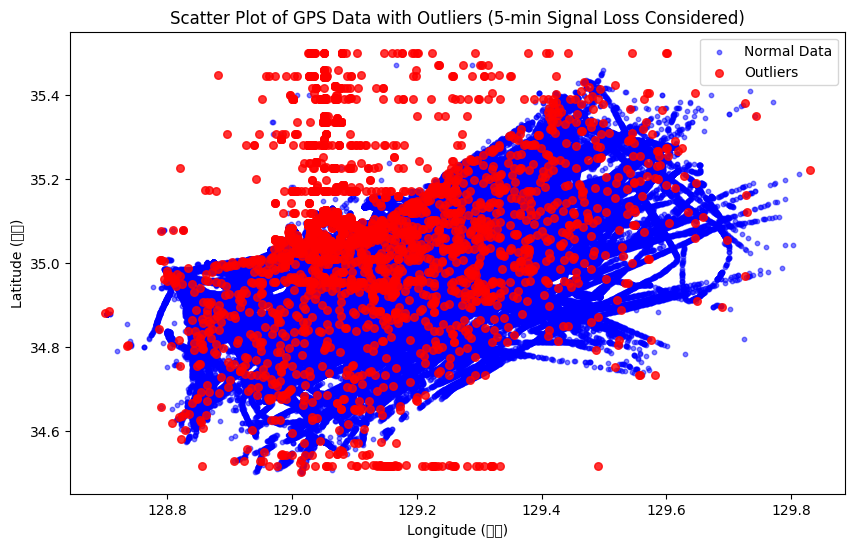

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic  # 두 좌표 사이 거리 계산

def calculate_haversine(lat1, lon1, lat2, lon2):
    """ 위도(lat)와 경도(lon)를 이용해 두 지점 사이의 거리를 계산 (단위: km) """
    if np.isnan(lat1) or np.isnan(lon1) or np.isnan(lat2) or np.isnan(lon2):
        return np.nan  # NaN이 있는 경우 거리를 NaN으로 설정
    return geodesic((lat1, lon1), (lat2, lon2)).km

# 데이터 불러오기
data = pd.read_csv("../document/cleaned_data.csv")

# datetime 변환 및 시간 간격 계산
data["created_at"] = pd.to_datetime(data["created_at"])
data["time_diff"] = data["created_at"].diff().dt.total_seconds()  # 시간 간격 (초 단위)

# 이전 위도, 경도 추가 (이동 거리 계산용)
data["prev_lat"] = data["lat"].shift(1)
data["prev_lon"] = data["lon"].shift(1)

# 이동 거리 계산 (NaN 처리는 유지)
data["distance"] = data.apply(lambda row: calculate_haversine(row["prev_lat"], row["prev_lon"], row["lat"], row["lon"]), axis=1)

# 신호 소실 여부 탐지 (5분 = 300초 이상 데이터가 끊겼으면 신호 소실)
data["signal_loss"] = data["time_diff"] > 300

# 이상치 탐지 기준 (예: 5km 이상 이동하면 이상치)
threshold = 5  # km

# 🚨 신호 소실(5분) 후 첫 번째 점프는 이상치에서 제외
data["outlier"] = (data["distance"] > threshold) & (~data["signal_loss"].shift(1).fillna(False))

plt.figure(figsize=(10, 6))

# 정상 데이터 (파란색)
plt.scatter(data[data["outlier"] == False]["lon"], 
            data[data["outlier"] == False]["lat"], 
            label="Normal Data", alpha=0.5, c="blue", s=10)

# 이상치 (빨간색)
plt.scatter(data[data["outlier"] == True]["lon"], 
            data[data["outlier"] == True]["lat"], 
            label="Outliers", alpha=0.8, c="red", s=30)

plt.xlabel("Longitude (경도)")
plt.ylabel("Latitude (위도)")
plt.title("Scatter Plot of GPS Data with Outliers (5-min Signal Loss Considered)")
plt.legend()
plt.show()





In [7]:
# 이상치 제거 (보간 없이 NaN 유지)
data_cleaned = data[data["outlier"] == False].drop(columns=["prev_lat", "prev_lon", "distance", "outlier", "signal_loss", "time_diff"])

# 전처리된 데이터 저장
data_cleaned.to_csv("../document/cleaned_data_no_outliers.csv", index=False)

print(f"이상치 제거 전 데이터 크기: {len(data)}")
print(f"이상치 제거 후 데이터 크기: {len(data_cleaned)}")


이상치 제거 전 데이터 크기: 1667427
이상치 제거 후 데이터 크기: 1663504


In [13]:
import numpy as np
import pandas as pd

# 데이터 로드
file_path = "../document/cleaned_data_no_outliers.csv"  # 파일 경로를 올바르게 설정하세요
data = pd.read_csv(file_path)

# datetime 변환
data["created_at"] = pd.to_datetime(data["created_at"])

# 이전 위도, 경도 추가 (이전 좌표와 비교)
data["prev_lat"] = data["lat"].shift(1)
data["prev_lon"] = data["lon"].shift(1)

# 경도 및 위도의 변화량 계산
data["lat_diff"] = abs(data["lat"] - data["prev_lat"])
data["lon_diff"] = abs(data["lon"] - data["prev_lon"])

# 신호 소실 여부 탐지 (5분 = 300초 이상 데이터가 끊겼으면 신호 소실)
data["time_diff"] = data["created_at"].diff().dt.total_seconds()
data["signal_loss"] = data["time_diff"] > 300

# 신호 소실이 아닌 경우, 경도 또는 위도가 0.1 이상 차이나는 데이터 찾기 (이상치)
outliers = data[(data["signal_loss"] == False) & ((data["lat_diff"] > 0.1) | (data["lon_diff"] > 0.1))]

# 이상치를 제거한 데이터 생성
filtered_data = data.drop(outliers.index)

# 정렬 (MMSI 및 시간 순으로 정렬)
filtered_data = filtered_data.sort_values(by=["mmsi", "created_at"])

# 이상치 제거 후 데이터 저장
output_file = "../document/cleaned_data_without_lat_lon_outliers.csv"
filtered_data.to_csv(output_file, index=False, encoding="utf-8-sig")

# 결과 출력
print(f"이상치 제거된 데이터 개수: {len(filtered_data)}")
print(f"이상치 제거 후 데이터가 '{output_file}'로 저장되었습니다.")


이상치 제거된 데이터 개수: 1662603
이상치 제거 후 데이터가 '../document/cleaned_data_without_lat_lon_outliers.csv'로 저장되었습니다.


위도 이상치 범위:
Lower: 34.9000, Upper: 35.2370
경도 이상치 범위:
Lower: 128.8970, Upper: 129.2801


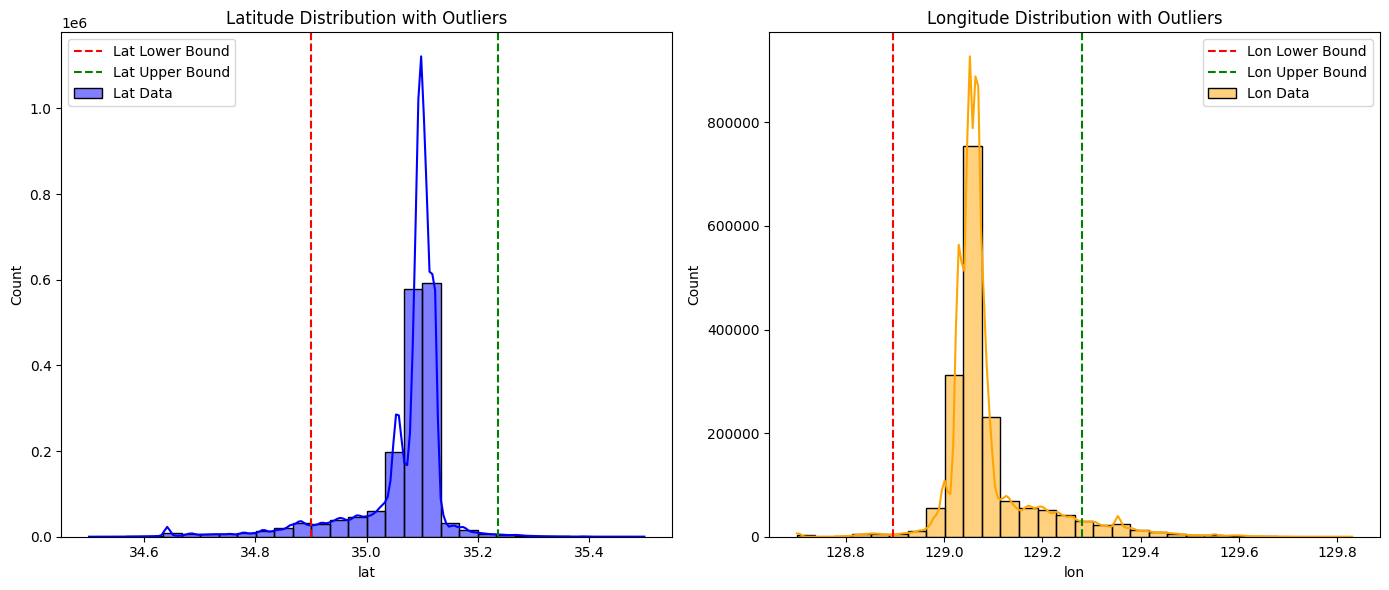

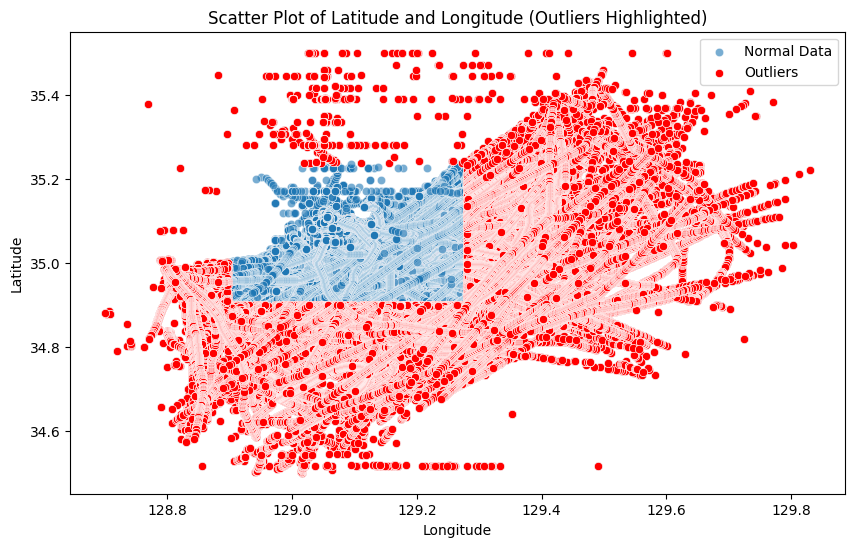

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('../document/processed_data.csv')

# 위도와 경도의 평균 및 표준편차 계산
lat_mean, lat_std = data['lat'].mean(), data['lat'].std()
lon_mean, lon_std = data['lon'].mean(), data['lon'].std()

# 이상치 기준: 평균 ± 2 * 표준편차
lat_lower, lat_upper = lat_mean - 2 * lat_std, lat_mean + 2 * lat_std
lon_lower, lon_upper = lon_mean - 2 * lon_std, lon_mean + 2 * lon_std

# 이상치 데이터 탐지
outliers = data[
    (data['lat'] < lat_lower) | (data['lat'] > lat_upper) |
    (data['lon'] < lon_lower) | (data['lon'] > lon_upper)
]

# 이상치 범위 출력
print("위도 이상치 범위:")
print(f"Lower: {lat_lower:.4f}, Upper: {lat_upper:.4f}")
print("경도 이상치 범위:")
print(f"Lower: {lon_lower:.4f}, Upper: {lon_upper:.4f}")

# 이상치와 정상 데이터 분포 시각화
plt.figure(figsize=(14, 6))

# 위도 분포
plt.subplot(1, 2, 1)
sns.histplot(data['lat'], kde=True, color='blue', label='Lat Data', bins=30)
plt.axvline(lat_lower, color='red', linestyle='--', label='Lat Lower Bound')
plt.axvline(lat_upper, color='green', linestyle='--', label='Lat Upper Bound')
plt.title('Latitude Distribution with Outliers')
plt.legend()

# 경도 분포
plt.subplot(1, 2, 2)
sns.histplot(data['lon'], kde=True, color='orange', label='Lon Data', bins=30)
plt.axvline(lon_lower, color='red', linestyle='--', label='Lon Lower Bound')
plt.axvline(lon_upper, color='green', linestyle='--', label='Lon Upper Bound')
plt.title('Longitude Distribution with Outliers')
plt.legend()

plt.tight_layout()
plt.show()

# 이상치의 위경도 산포도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['lon'], y=data['lat'], label='Normal Data', alpha=0.6)
sns.scatterplot(x=outliers['lon'], y=outliers['lat'], color='red', label='Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude (Outliers Highlighted)')
plt.legend()
plt.show()
